# Task 3
# Name: Aarya Katulwar

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
# Load dataset
df = pd.read_csv("/content/Housing.csv")

In [3]:
# Check basic info
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB
None
              price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mea

In [4]:
# Encode categorical data if any
df['furnishingstatus'] = df['furnishingstatus'].map({'unfurnished': 0, 'semi-furnished': 1, 'furnished': 2})

In [8]:
# Feature & target selection
X = df.drop('price', axis=1)
y = df['price']

# One-hot encode remaining categorical columns
X = pd.get_dummies(X, drop_first=True)

In [10]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Model Training
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [12]:
# Predictions
y_pred = model.predict(X_test)

In [13]:
# Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [14]:
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

MAE: 979679.69
MSE: 1771751116594.03
R² Score: 0.65


In [15]:
# Coefficients
print("\nCoefficients:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef:.2f}")


Coefficients:
area: 235.85
bedrooms: 78574.49
bathrooms: 1097117.27
stories: 406223.16
parking: 225756.51
furnishingstatus: 210397.12
mainroad_yes: 366824.19
guestroom_yes: 233146.77
basement_yes: 393159.78
hotwaterheating_yes: 687881.31
airconditioning_yes: 785550.58
prefarea_yes: 629901.66


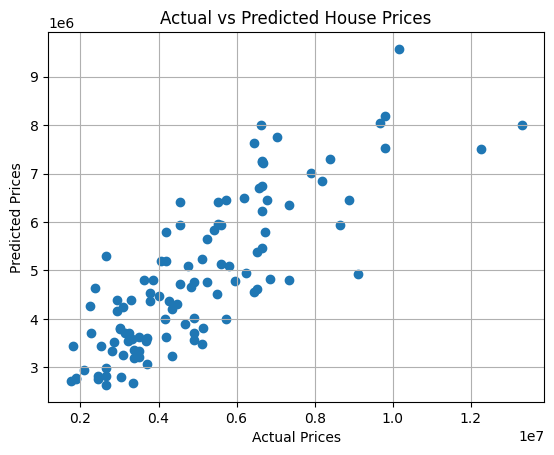

In [16]:
# Plotting actual vs predicted
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.grid(True)
plt.show()